In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from __future__ import print_function

from matplotlib import rcParams
rcParams["savefig.dpi"] = 200
rcParams["font.size"] = 8

# Create your own region
Creating own regions is straightforward.

Import regionmask and check the version:

In [2]:
import regionmask
regionmask.__version__

'0.9.0'

Assume you have two custom regions in the US.

In [3]:
US1 = [[-100., 30], [-100, 40], [-120, 35]]
US2 = [[-100., 30], [-80, 30], [-80, 40], [-100, 40]]

You also need to provide numbers, names and abbreviations:

In [4]:
numbers = [0, 1]
names = ['US_west', 'US_east']
abbrevs = ['USw', 'USe']

USmask = regionmask.Regions_cls('USmask', numbers, names, abbrevs, [US1, US2])

Again we can plot the outline of the defined regions

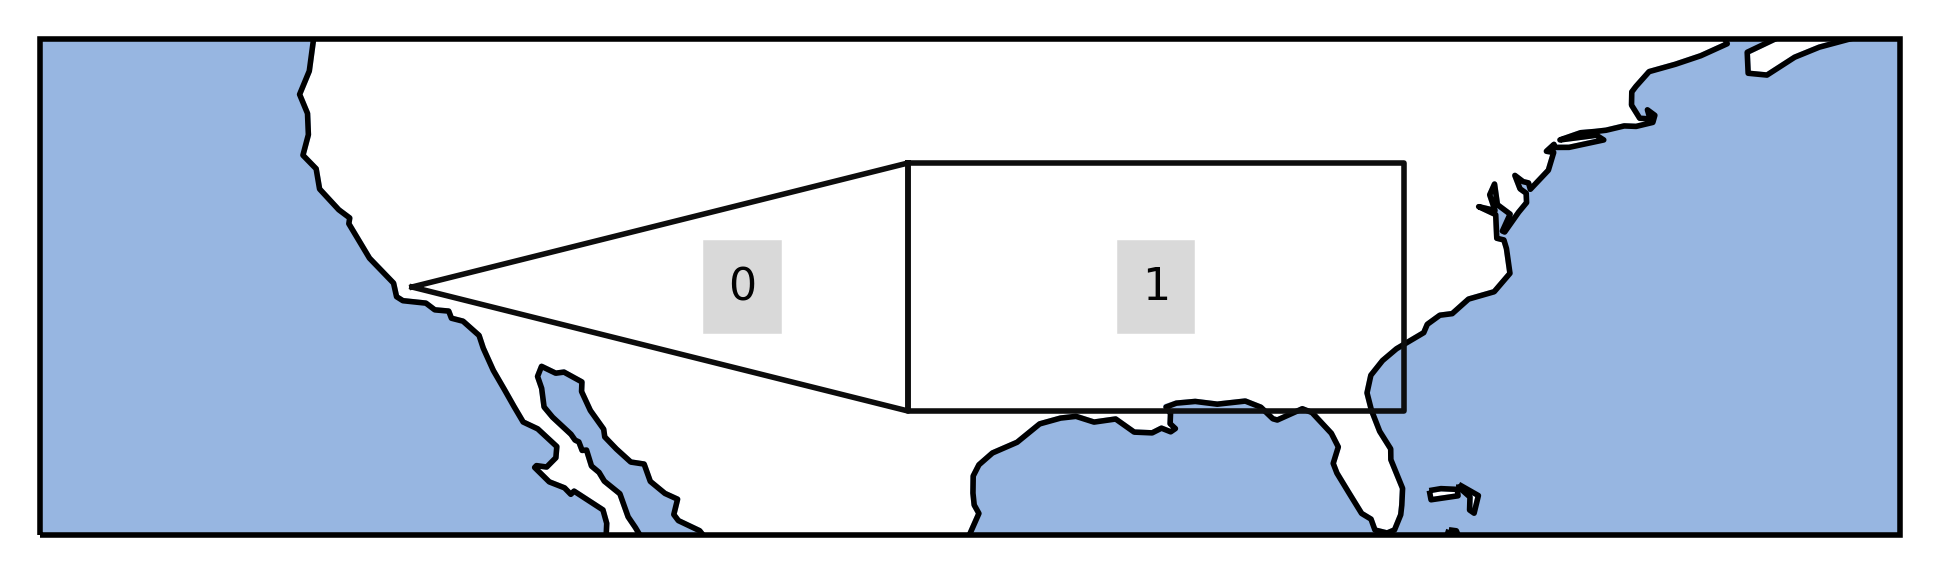

In [6]:
ax = USmask.plot() #(label='abbrev')

# load cartopy
import cartopy.crs as ccrs
# fine tune the extent
ax.set_extent([225, 300, 25, 45], crs=ccrs.PlateCarree());

and obtain a mask:

In [7]:
import numpy as np

# define lat/ lon grid
lon = np.arange(200.5, 330)
lat = np.arange(74.5, 15, -1)

# for the plotting
lon_edges = np.arange(200, 330)
lat_edges = np.arange(74, 14, -1)

mask = USmask.mask(lon, lat, wrap_lon=True)

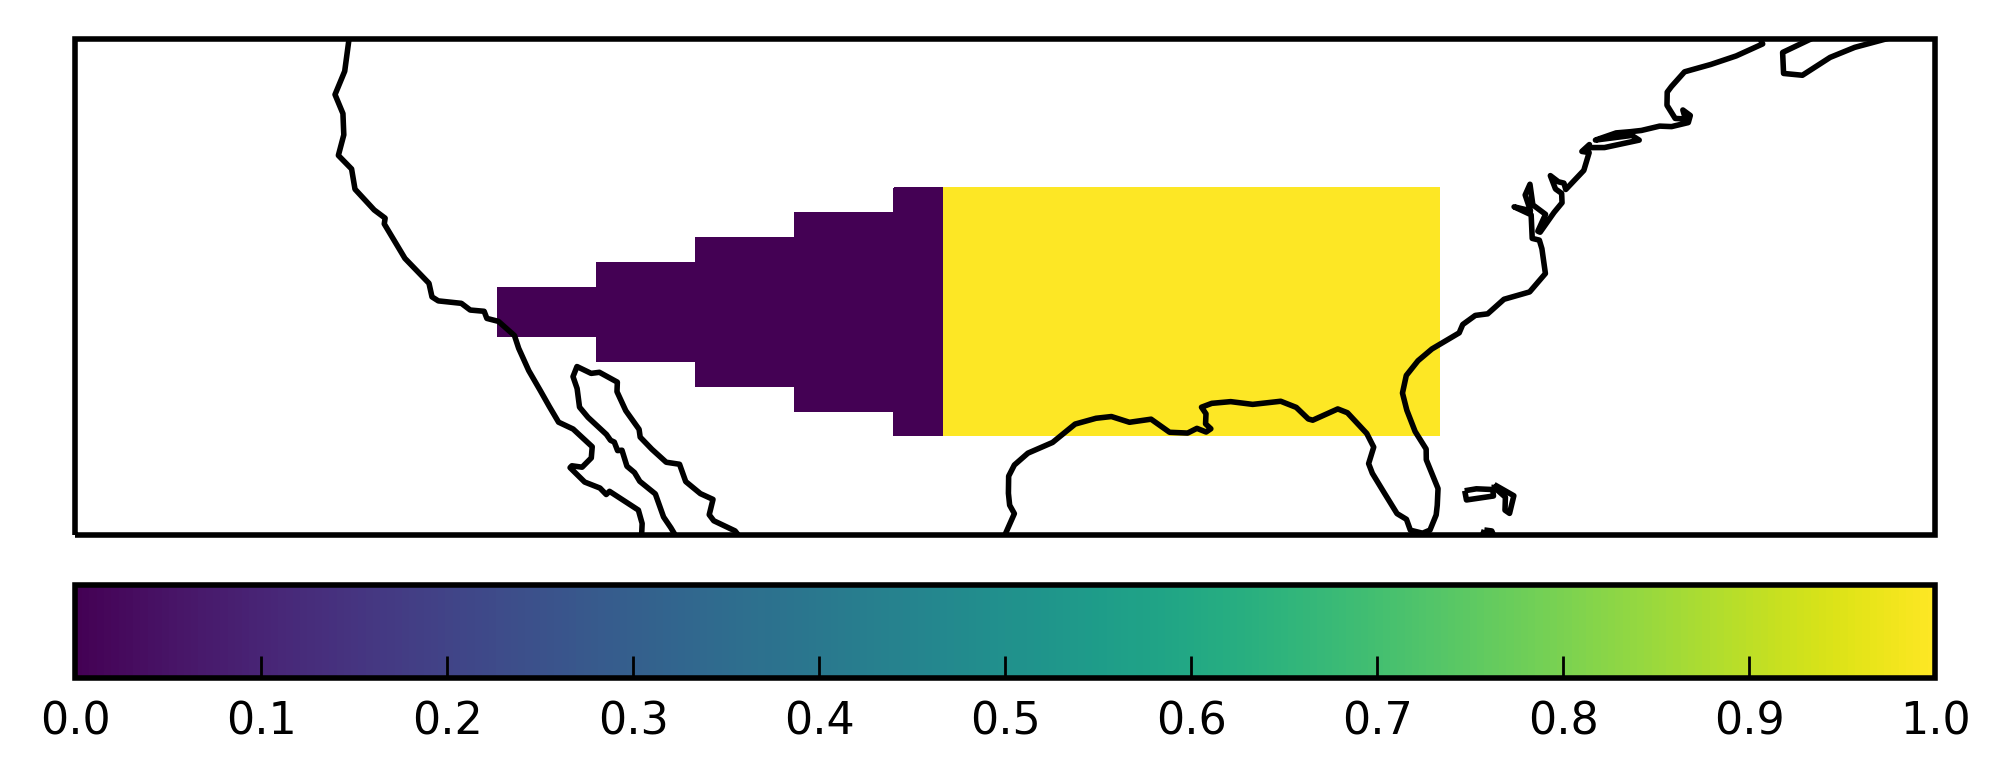

In [8]:
import matplotlib.pyplot as plt

ax = plt.subplot(111, projection=ccrs.PlateCarree())
# pcolormesh does not handle NaNs, requires masked array
mask_ma = np.ma.masked_invalid(mask)

h = ax.pcolormesh(lon_edges, lat_edges, mask_ma, transform=ccrs.PlateCarree(), cmap='viridis')

ax.coastlines()

plt.colorbar(h, orientation='horizontal', pad=0.04);

ax.set_extent([225, 300, 25, 45], crs=ccrs.PlateCarree());

## Use shapely Polygon

If you have the region defined as a shapely polygon, this also works:

In [9]:
from shapely.geometry import Polygon

US1_poly = Polygon(US1)
US2_poly = Polygon(US2)

In [10]:
USmask_poly = regionmask.Regions_cls('USmask', numbers, names, abbrevs, [US1_poly, US2_poly])